In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
svm = pd.read_csv('label_game_data.csv')

In [3]:
svm.head()

,QueryName,ReleaseDate,RequiredAge,DeveloperCount,DLCCount,Metacritic,RecommendationCount,PublisherCount,ScreenshotCount,SteamSpyOwners,...,PurchaseAvail,SubscriptionAvail,PriceCurrency,PriceInitial,PriceFinal,SupportedLanguages,Platforms,Categories,Genres,Recommended
0,Counter-Strike,Nov 1 2000,0,1,0,88,68991,1,13,13033334,...,1,0,USD,9.99,9.99,English French German Italian Spanish Simplifi...,"Windows, Linux, Mac",Multiplayer,Action,1
1,Team Fortress Classic,Apr 1 1999,0,1,0,0,2439,1,5,5399140,...,1,0,USD,4.99,4.99,English French German Italian Spanish,"Windows, Linux, Mac",Multiplayer,Action,1
2,Day of Defeat,May 1 2003,0,1,0,79,2319,1,5,7621102,...,1,0,USD,4.99,4.99,English French German Italian Spanish,"Windows, Linux, Mac",Multiplayer,Action,1
3,Deathmatch Classic,Jun 1 2001,0,1,0,0,888,1,4,7498965,...,1,0,USD,4.99,4.99,English French German Italian Spanish,"Windows, Linux, Mac",Multiplayer,Action,0
4,Half-Life: Opposing Force,Nov 1 1999,0,1,0,0,2934,1,5,5399499,...,1,0,USD,4.99,4.99,English French German Korean,"Windows, Linux, Mac","SinglePlayer, Multiplayer",Action,1


In [4]:
svm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13357 entries, 0 to 13356
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   QueryName                    13356 non-null  object 
 1   ReleaseDate                  13357 non-null  object 
 2   RequiredAge                  13357 non-null  int64  
 3   DeveloperCount               13357 non-null  int64  
 4   DLCCount                     13357 non-null  int64  
 5   Metacritic                   13357 non-null  int64  
 6   RecommendationCount          13357 non-null  int64  
 7   PublisherCount               13357 non-null  int64  
 8   ScreenshotCount              13357 non-null  int64  
 9   SteamSpyOwners               13357 non-null  int64  
 10  SteamSpyPlayersEstimate      13357 non-null  int64  
 11  AchievementCount             13357 non-null  int64  
 12  AchievementHighlightedCount  13357 non-null  int64  
 13  ControllerSuppor

In [5]:
columns = ["PriceCurrency","PriceInitial","PriceFinal"]

svm = svm.drop(columns, axis=1)
svm

,QueryName,ReleaseDate,RequiredAge,DeveloperCount,DLCCount,Metacritic,RecommendationCount,PublisherCount,ScreenshotCount,SteamSpyOwners,...,ControllerSupport,IsFree,FreeVerAvail,PurchaseAvail,SubscriptionAvail,SupportedLanguages,Platforms,Categories,Genres,Recommended
0,Counter-Strike,Nov 1 2000,0,1,0,88,68991,1,13,13033334,...,0,0,0,1,0,English French German Italian Spanish Simplifi...,"Windows, Linux, Mac",Multiplayer,Action,1
1,Team Fortress Classic,Apr 1 1999,0,1,0,0,2439,1,5,5399140,...,0,0,0,1,0,English French German Italian Spanish,"Windows, Linux, Mac",Multiplayer,Action,1
2,Day of Defeat,May 1 2003,0,1,0,79,2319,1,5,7621102,...,0,0,0,1,0,English French German Italian Spanish,"Windows, Linux, Mac",Multiplayer,Action,1
3,Deathmatch Classic,Jun 1 2001,0,1,0,0,888,1,4,7498965,...,0,0,0,1,0,English French German Italian Spanish,"Windows, Linux, Mac",Multiplayer,Action,0
4,Half-Life: Opposing Force,Nov 1 1999,0,1,0,0,2934,1,5,5399499,...,0,0,0,1,0,English French German Korean,"Windows, Linux, Mac","SinglePlayer, Multiplayer",Action,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13352,Baseball Riot,Jan 17 2017,0,1,0,0,0,1,8,0,...,1,0,0,0,0,English**languages with full audio support,Windows,SinglePlayer,"Indie, Casual, Sports",0
13353,Passage 4,Dec 13 2016,0,1,0,0,0,1,10,0,...,0,0,0,0,0,English* French Italian German* Spanish Dutch*...,Windows,SinglePlayer,"Indie, Casual",0
13354,Piximalism,Sep 26 2019,0,1,0,0,0,1,5,0,...,0,0,0,0,0,English,Windows,SinglePlayer,"Indie, Action, Adventure, Casual",0
13355,Technoball,Dec 12 2016,0,1,0,0,0,1,9,0,...,0,0,0,0,0,English**languages with full audio support,Windows,"SinglePlayer, Multiplayer, Coop","Indie, Action, Casual, Sports",0


In [6]:
columns_to_convert = ['SupportedLanguages', 'Platforms', 
                      'Categories', 'Genres', 'Recommended']

svm[columns_to_convert] = svm[columns_to_convert].astype('category')

print(svm.dtypes)

QueryName                        object
ReleaseDate                      object
RequiredAge                       int64
DeveloperCount                    int64
DLCCount                          int64
Metacritic                        int64
RecommendationCount               int64
PublisherCount                    int64
ScreenshotCount                   int64
SteamSpyOwners                    int64
SteamSpyPlayersEstimate           int64
AchievementCount                  int64
AchievementHighlightedCount       int64
ControllerSupport                 int64
IsFree                            int64
FreeVerAvail                      int64
PurchaseAvail                     int64
SubscriptionAvail                 int64
SupportedLanguages             category
Platforms                      category
Categories                     category
Genres                         category
Recommended                    category
dtype: object


In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

label_encoder = LabelEncoder()
for col in ['SupportedLanguages', 'Platforms', 'Categories', 'Genres', 'Recommended']:
    svm[col] = label_encoder.fit_transform(svm[col])
    
X = svm[['Genres', 'Categories','Platforms','Metacritic','SteamSpyOwners','SteamSpyPlayersEstimate', 'RecommendationCount']]
y = svm['Recommended']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
X_train

,Genres,Categories,Platforms,Metacritic,SteamSpyOwners,SteamSpyPlayersEstimate,RecommendationCount
11219,666,76,2,0,0,0,0
5261,220,9,3,0,47169,22777,0
12513,313,32,2,0,7891,4484,0
4459,515,40,4,0,32104,13631,0
4963,479,32,4,0,47707,37663,551
...,...,...,...,...,...,...,...
11964,308,32,2,0,10044,6815,0
5191,219,32,4,0,32283,21701,235
5390,260,32,2,0,203024,137202,704
860,173,32,2,0,1614,897,0


In [9]:
X_test

,Genres,Categories,Platforms,Metacritic,SteamSpyOwners,SteamSpyPlayersEstimate,RecommendationCount
1783,633,62,2,0,3133058,1212224,5750
7596,313,32,5,0,9685,1076,0
5964,0,32,5,0,59365,5560,0
1978,402,13,4,74,3102568,2548199,48918
1085,641,9,2,0,153344,42327,0
...,...,...,...,...,...,...,...
2676,637,46,2,76,17935,12734,326
4833,220,46,4,0,18832,3228,0
9338,0,46,2,0,14169,12734,221
8576,93,9,2,0,717,811,0


In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

# Encode the categorical columns
label_encoder = LabelEncoder()
for col in ['SupportedLanguages', 'Platforms', 'Categories', 'Genres', 'Recommended']:
    svm[col] = label_encoder.fit_transform(svm[col])

# Split the data into features and target
X = svm[['Genres', 'Categories','Platforms','Metacritic','SteamSpyOwners','SteamSpyPlayersEstimate', 'RecommendationCount']]
y = svm['Recommended']

# Resample the data to get a 50/50 split of Recommended and Not Recommended, with 500 rows each
recommended = svm[svm['Recommended'] == 1]
not_recommended = svm[svm['Recommended'] == 0]

# Downsample the majority class (Not Recommended) to 500 rows
not_recommended_downsampled = resample(not_recommended,
                                      replace=False,
                                      n_samples=250,
                                      random_state=42)

# Upsample the minority class (Recommended) to 500 rows
recommended_upsampled = resample(recommended,
                                replace=True,
                                n_samples=250,
                                random_state=42)

# Combine the downsampled majority class and the upsampled minority class
balanced_data = pd.concat([not_recommended_downsampled, recommended_upsampled])

# Split the balanced data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(balanced_data[['Genres', 'Categories','Platforms','Metacritic','SteamSpyOwners','SteamSpyPlayersEstimate', 'RecommendationCount']],
                                                    balanced_data['Recommended'],
                                                    test_size=0.3,
                                                    random_state=42)

In [11]:
X_train

,Genres,Categories,Platforms,Metacritic,SteamSpyOwners,SteamSpyPlayersEstimate,RecommendationCount
4181,310,27,2,0,87343,85729,2601
6093,666,76,4,0,0,0,0
5458,428,32,4,0,12016,6098,0
12764,487,32,4,0,5022,4842,0
8679,50,28,2,0,680094,435640,1331
...,...,...,...,...,...,...,...
4500,127,32,5,0,6995,4125,0
2314,89,32,2,79,1032157,939612,17042
3479,1,46,2,91,1213479,1122908,26956
5122,120,27,2,0,576430,274405,1210


In [12]:
X_test

,Genres,Categories,Platforms,Metacritic,SteamSpyOwners,SteamSpyPlayersEstimate,RecommendationCount
789,81,32,2,72,481195,257905,2593
5583,487,32,2,0,9147,1347,0
1198,81,33,4,89,6969346,6263964,86362
5510,221,47,4,0,0,0,0
500,366,9,2,0,224725,66180,692
...,...,...,...,...,...,...,...
6470,273,47,4,0,251986,170741,5141
11314,666,76,2,0,0,0,0
12376,530,32,2,0,5560,897,0
205,0,47,2,87,534103,207507,877


In [14]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_model_1 = SVC(kernel='linear', C=0.000000000000005).fit(X_train, y_train)
svm_model_2 = SVC(kernel='linear', C=0.0000000000025).fit(X_train, y_train)
svm_model_3 = SVC(kernel='linear', C=1).fit(X_train, y_train)

# Make predictions and calculate accuracy for each model
y_pred_1 = svm_model_1.predict(X_test)
y_pred_2 = svm_model_2.predict(X_test)
y_pred_3 = svm_model_3.predict(X_test)

acc_1 = accuracy_score(y_test, y_pred_1)
acc_2 = accuracy_score(y_test, y_pred_2)
acc_3 = accuracy_score(y_test, y_pred_3)

# Print the results
print(f"Linear Kernel, C=0.000000000000005, Accuracy: {acc_1:.2f}")
print(f"Linear Kernel, C=0.0000000000025, Accuracy: {acc_2:.2f}")
print(f"Linear Kernel, C=1, Accuracy: {acc_3:.2f}")

Linear Kernel, C=0.000000000000005, Accuracy: 0.65
Linear Kernel, C=0.0000000000025, Accuracy: 0.94
Linear Kernel, C=1, Accuracy: 0.97


In [15]:
from sklearn.metrics import confusion_matrix

# Create confusion matrices
cm_1 = confusion_matrix(y_test, y_pred_1)
cm_2 = confusion_matrix(y_test, y_pred_2)
cm_3 = confusion_matrix(y_test, y_pred_3)

# Print the confusion matrices
print("Linear Kernel, C=0.000000000000005:")
print(cm_1)
print("\nLinear Kernel, C=0.0000000000025:")
print(cm_2)
print("\nLinear Kernel, C=0.1:")
print(cm_3)

Linear Kernel, C=0.000000000000005:
[[76  0]
 [52 22]]

Linear Kernel, C=0.0000000000025:
[[70  6]
 [ 3 71]]

Linear Kernel, C=0.1:
[[71  5]
 [ 0 74]]


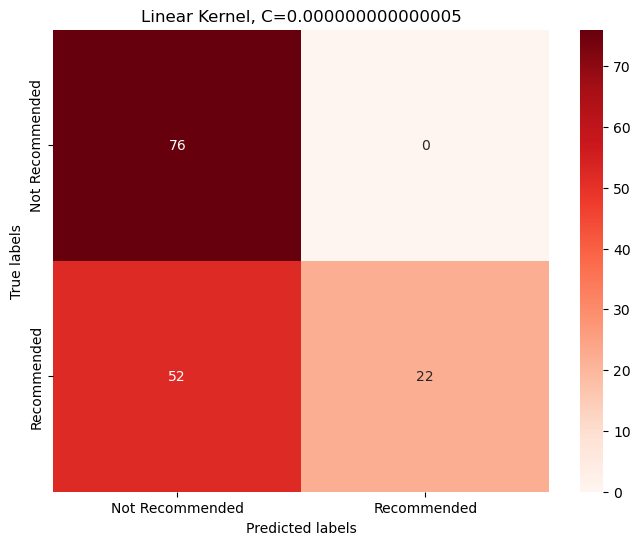

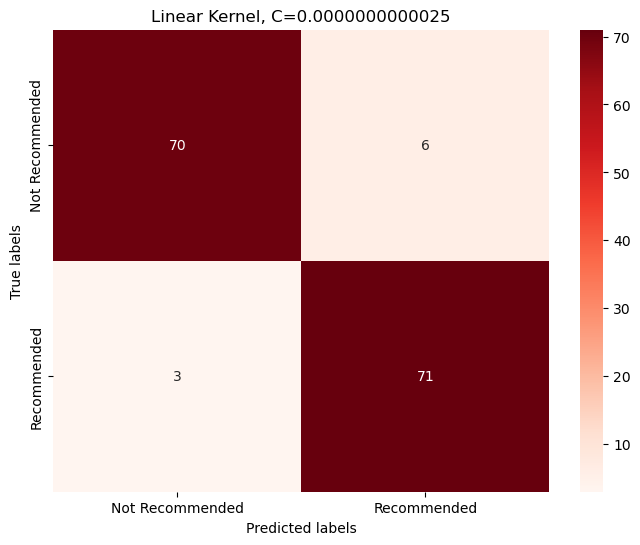

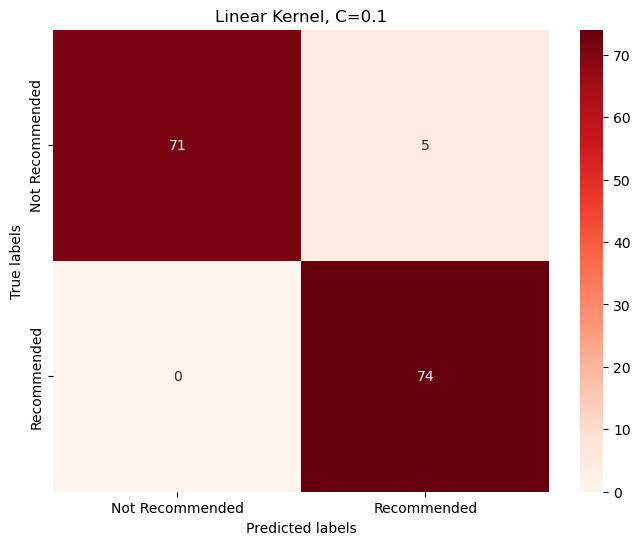

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create confusion matrices
cm_1 = confusion_matrix(y_test, y_pred_1)
cm_2 = confusion_matrix(y_test, y_pred_2)
cm_3 = confusion_matrix(y_test, y_pred_3)

# Plot the confusion matrices
plt.figure(figsize=(8, 6))
sns.heatmap(cm_1, annot=True, cmap='Reds', fmt='g', 
            xticklabels=["Not Recommended", "Recommended"], 
            yticklabels=["Not Recommended", "Recommended"])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Linear Kernel, C=0.000000000000005')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(cm_2, annot=True, cmap='Reds', fmt='g', 
            xticklabels=["Not Recommended", "Recommended"], 
            yticklabels=["Not Recommended", "Recommended"])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Linear Kernel, C=0.0000000000025')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(cm_3, annot=True, cmap='Reds', fmt='g', 
            xticklabels=["Not Recommended", "Recommended"], 
            yticklabels=["Not Recommended", "Recommended"])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Linear Kernel, C=0.1')
plt.show()

In [17]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create the SVM models with different C values and RBF kernel
svm_model_4 = SVC(kernel='rbf', C=0.005).fit(X_train, y_train)
svm_model_5 = SVC(kernel='rbf', C=0.1).fit(X_train, y_train)
svm_model_6 = SVC(kernel='rbf', C=5).fit(X_train, y_train)

# Make predictions and calculate accuracy for each model
y_pred_4 = svm_model_4.predict(X_test)
y_pred_5 = svm_model_5.predict(X_test)
y_pred_6 = svm_model_6.predict(X_test)

# Calculate the accuracy of each model
acc_4 = accuracy_score(y_test, y_pred_4)
acc_5 = accuracy_score(y_test, y_pred_5)
acc_6 = accuracy_score(y_test, y_pred_6)

# Print the results
print(f"RBF Kernel, C=0.005, Accuracy: {acc_4:.2f}")
print(f"RBF Kernel, C=0.1, Accuracy: {acc_5:.2f}")
print(f"RBF Kernel, C=5, Accuracy: {acc_6:.2f}")

RBF Kernel, C=0.005, Accuracy: 0.49
RBF Kernel, C=0.1, Accuracy: 0.81
RBF Kernel, C=5, Accuracy: 0.94


In [18]:
from sklearn.metrics import confusion_matrix

# Create confusion matrices
cm_4 = confusion_matrix(y_test, y_pred_4)
cm_5 = confusion_matrix(y_test, y_pred_5)
cm_6 = confusion_matrix(y_test, y_pred_6)

# Print the confusion matrices
print("RBF Kernel, C=0.005:")
print(cm_4)
print("\nRBF Kernel, C=0.1:")
print(cm_5)
print("\nRBF Kernel, C=1:")
print(cm_6)

RBF Kernel, C=0.005:
[[ 0 76]
 [ 0 74]]

RBF Kernel, C=0.1:
[[74  2]
 [27 47]]

RBF Kernel, C=1:
[[70  6]
 [ 3 71]]


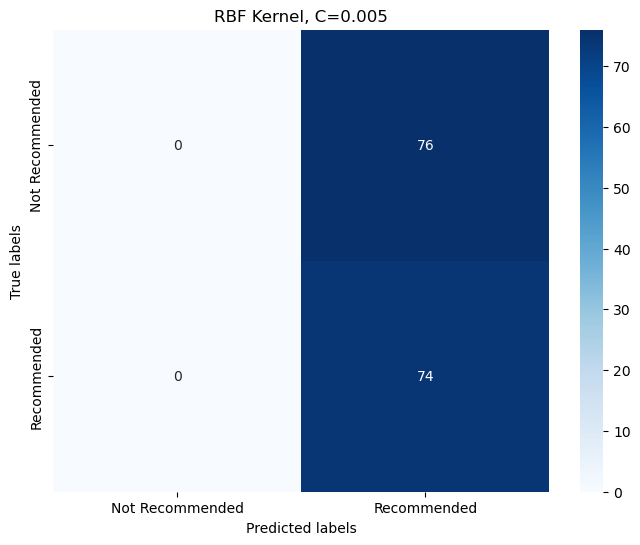

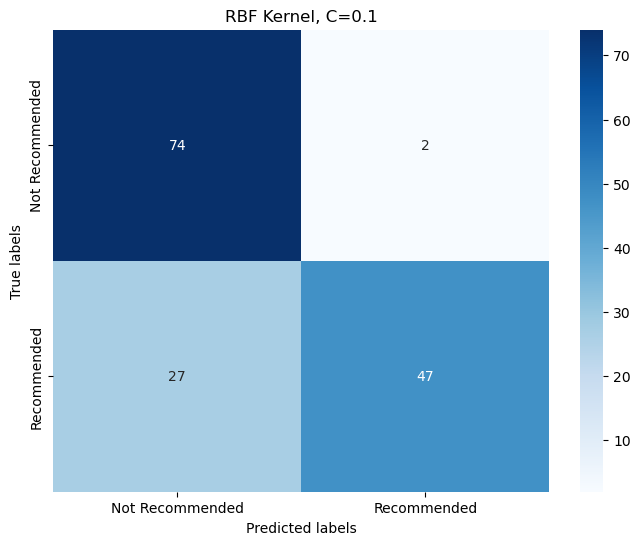

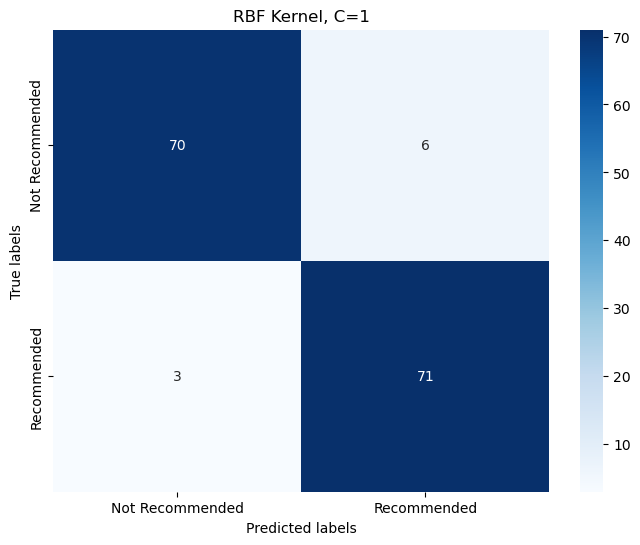

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create confusion matrices
cm_4 = confusion_matrix(y_test, y_pred_4)
cm_5 = confusion_matrix(y_test, y_pred_5)
cm_6 = confusion_matrix(y_test, y_pred_6)

# Plot the confusion matrices
plt.figure(figsize=(8, 6))
sns.heatmap(cm_4, annot=True, cmap='Blues', fmt='g', 
            xticklabels=["Not Recommended", "Recommended"], 
            yticklabels=["Not Recommended", "Recommended"])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('RBF Kernel, C=0.005')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(cm_5, annot=True, cmap='Blues', fmt='g', 
            xticklabels=["Not Recommended", "Recommended"], 
            yticklabels=["Not Recommended", "Recommended"])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('RBF Kernel, C=0.1')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(cm_6, annot=True, cmap='Blues', fmt='g', 
            xticklabels=["Not Recommended", "Recommended"], 
            yticklabels=["Not Recommended", "Recommended"])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('RBF Kernel, C=1')
plt.show()

In [20]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create the 3 SVM models with different C values and polynomial kernel
svm_model_7 = SVC(kernel='poly', C=1, degree=3).fit(X_train, y_train)
svm_model_8 = SVC(kernel='poly', C=5, degree=2).fit(X_train, y_train)
svm_model_9 = SVC(kernel='poly', C=14, degree=1).fit(X_train, y_train)

# Make predictions and calculate accuracy for each model
y_pred_7 = svm_model_7.predict(X_test)
y_pred_8 = svm_model_8.predict(X_test)
y_pred_9 = svm_model_9.predict(X_test)

# Calculate accuracy scores
acc_7 = accuracy_score(y_test, y_pred_7)
acc_8 = accuracy_score(y_test, y_pred_8)
acc_9 = accuracy_score(y_test, y_pred_9)

# Print the results
print(f"Polynomial Kernel, C=1, Accuracy: {acc_7:.2f}")
print(f"Polynomial Kernel, C=5, Accuracy: {acc_8:.2f}")
print(f"Polynomial Kernel, C=14, Accuracy: {acc_9:.2f}")

Polynomial Kernel, C=1, Accuracy: 0.71
Polynomial Kernel, C=5, Accuracy: 0.80
Polynomial Kernel, C=14, Accuracy: 0.94


In [21]:
from sklearn.metrics import confusion_matrix

# Create confusion matrices
cm_7 = confusion_matrix(y_test, y_pred_7)
cm_8 = confusion_matrix(y_test, y_pred_8)
cm_9 = confusion_matrix(y_test, y_pred_9)

# Print the confusion matrices
print("Polynomial Kernel, C=1:")
print(cm_7)
print("\nPolynomial Kernel, C=5:")
print(cm_8)
print("\nPolynomial Kernel, C=14:")
print(cm_9)

Polynomial Kernel, C=1:
[[76  0]
 [43 31]]

Polynomial Kernel, C=5:
[[74  2]
 [28 46]]

Polynomial Kernel, C=14:
[[70  6]
 [ 3 71]]


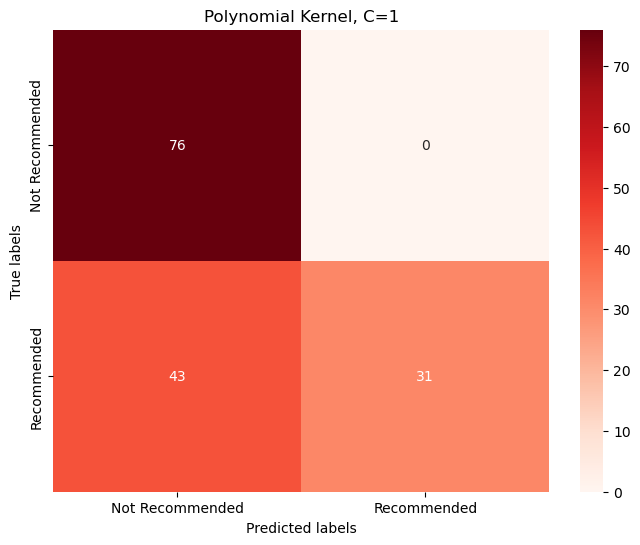

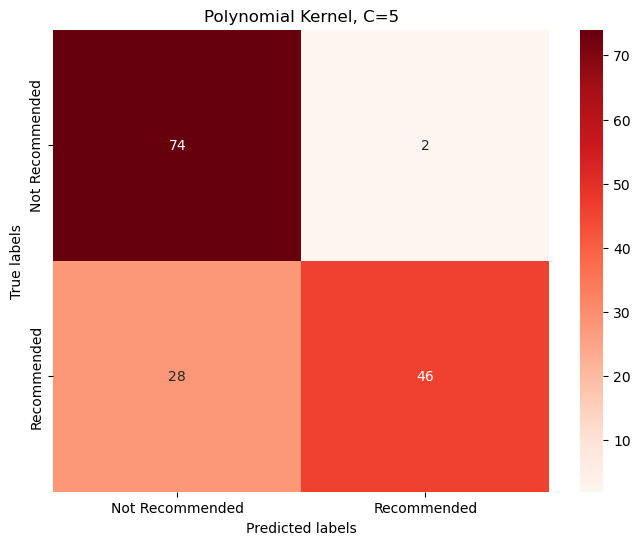

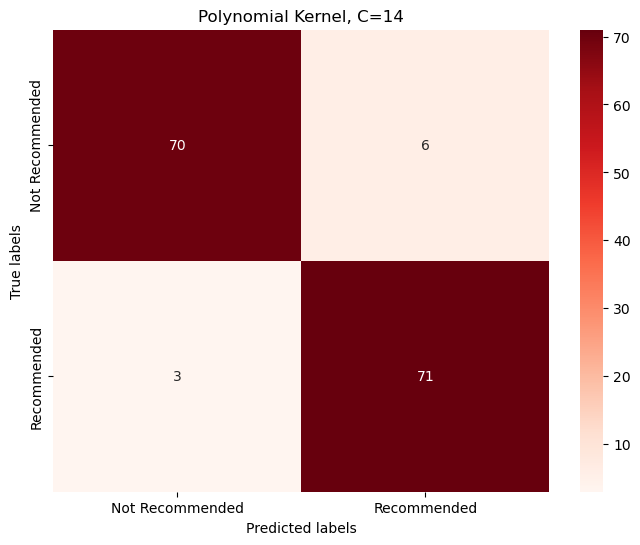

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create confusion matrices
cm_7 = confusion_matrix(y_test, y_pred_7)
cm_8 = confusion_matrix(y_test, y_pred_8)
cm_9 = confusion_matrix(y_test, y_pred_9)

# Plot the confusion matrices
plt.figure(figsize=(8, 6))
sns.heatmap(cm_7, annot=True, cmap='Reds', fmt='g', 
            xticklabels=["Not Recommended", "Recommended"], 
            yticklabels=["Not Recommended", "Recommended"])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Polynomial Kernel, C=1')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(cm_8, annot=True, cmap='Reds', fmt='g', 
            xticklabels=["Not Recommended", "Recommended"], 
            yticklabels=["Not Recommended", "Recommended"])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Polynomial Kernel, C=5')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(cm_9, annot=True, cmap='Reds', fmt='g', 
            xticklabels=["Not Recommended", "Recommended"], 
            yticklabels=["Not Recommended", "Recommended"])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Polynomial Kernel, C=14')
plt.show()

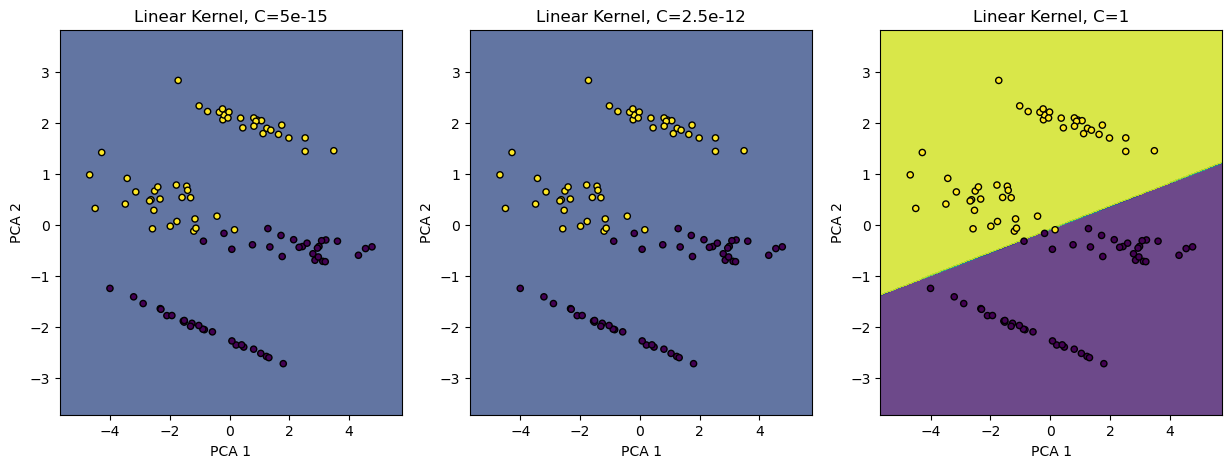

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

# Create a dataset
X, y = make_classification(n_samples=100, n_features=7, n_informative=2, n_redundant=5, random_state=42)

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Apply PCA to reduce the number of features to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Train the SVM models with the reduced number of features
svm_model_1 = SVC(kernel='linear', C=0.000000000000005).fit(X_train, y_train)
svm_model_2 = SVC(kernel='linear', C=0.0000000000025).fit(X_train, y_train)
svm_model_3 = SVC(kernel='linear', C=1).fit(X_train, y_train)

# Create a meshgrid for visualization
h = 0.02
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot the decision boundaries for each model
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, model in enumerate([svm_model_1, svm_model_2, svm_model_3]):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax[i].contourf(xx, yy, Z, alpha=0.8)
    ax[i].scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=20, edgecolor='k')
    ax[i].set_xlabel('PCA 1')
    ax[i].set_ylabel('PCA 2')
    ax[i].set_title(f'Linear Kernel, C={model.C}')
plt.show()

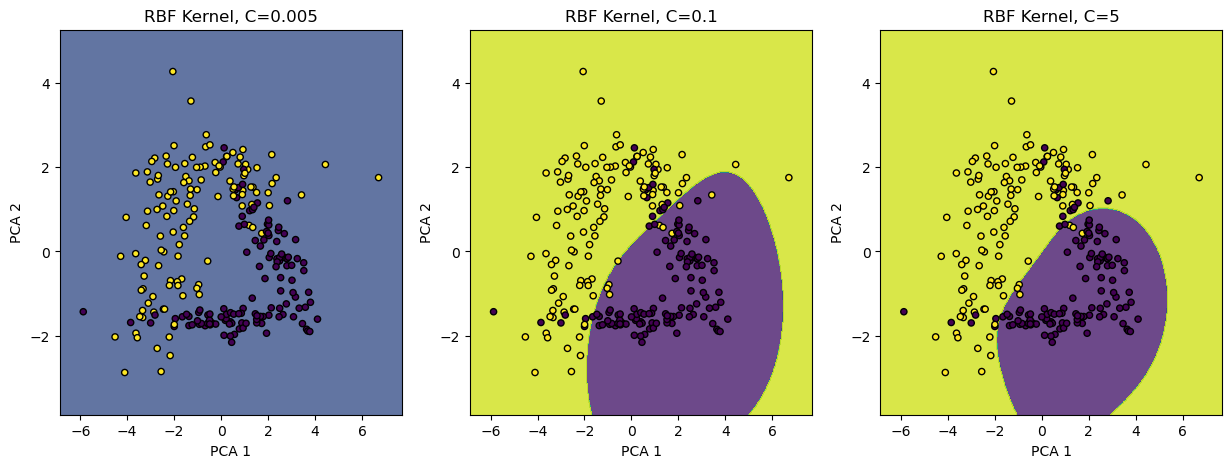

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

# Create a dataset
X, y = make_classification(n_samples=250, n_features=7, n_informative=2, n_redundant=5, random_state=42)

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Apply PCA to reduce the number of features to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Train the SVM models with the reduced number of features
svm_model_4 = SVC(kernel='rbf', C=0.005).fit(X_train, y_train)
svm_model_5 = SVC(kernel='rbf', C=0.1).fit(X_train, y_train)
svm_model_6 = SVC(kernel='rbf', C=5).fit(X_train, y_train)

# Create a meshgrid for visualization
h = 0.02
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot the decision boundaries for each model
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, model in enumerate([svm_model_4, svm_model_5, svm_model_6]):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax[i].contourf(xx, yy, Z, alpha=0.8)
    ax[i].scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=20, edgecolor='k')
    ax[i].set_xlabel('PCA 1')
    ax[i].set_ylabel('PCA 2')
    ax[i].set_title(f'RBF Kernel, C={model.C}')
plt.show()

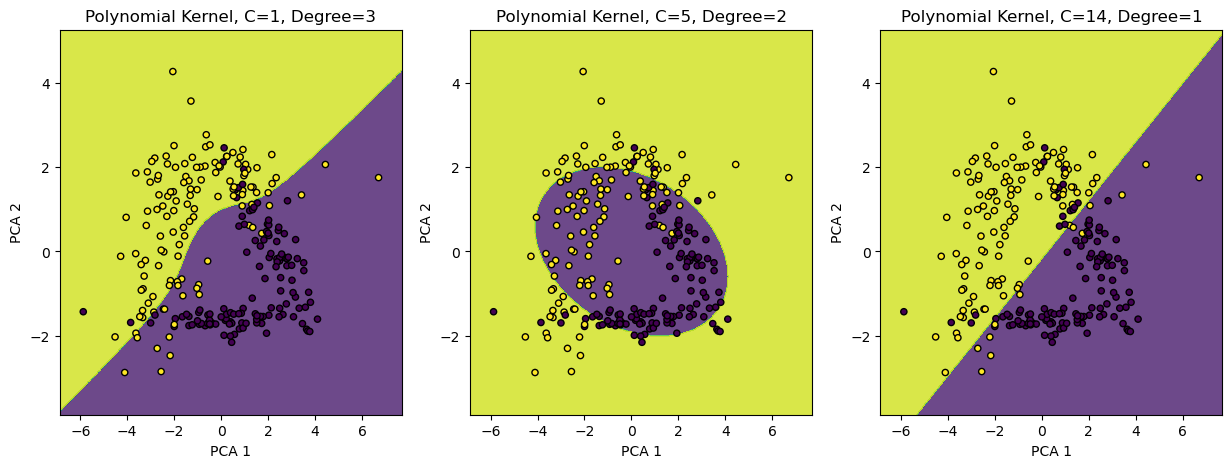

In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

# Create a dataset
X, y = make_classification(n_samples=250, n_features=7, n_informative=2, n_redundant=5, random_state=42)

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Apply PCA to reduce the number of features to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Train the SVM models with the reduced number of features
svm_model_7 = SVC(kernel='poly', C=1, degree=3).fit(X_train, y_train)
svm_model_8 = SVC(kernel='poly', C=5, degree=2).fit(X_train, y_train)
svm_model_9 = SVC(kernel='poly', C=14, degree=1).fit(X_train, y_train)

# Create a meshgrid for visualization
h = 0.02
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot the decision boundaries for each model
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, model in enumerate([svm_model_7, svm_model_8, svm_model_9]):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax[i].contourf(xx, yy, Z, alpha=0.8)
    ax[i].scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=20, edgecolor='k')
    ax[i].set_xlabel('PCA 1')
    ax[i].set_ylabel('PCA 2')
    ax[i].set_title(f'Polynomial Kernel, C={model.C}, Degree={model.degree}')
plt.show()